# Enhancing direct marketing campaigns for term deposits

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from tabulate import tabulate
import pickle
# shows the plots inline
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from scipy import stats
np.random.seed(42)

In [2]:
df = pd.read_csv('bank-additional-full.csv',sep = ';')

In [3]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [5]:
df.shape

(41188, 21)

In [7]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
df.duplicated().sum()

12

In [11]:
df.drop_duplicates(keep='first', inplace=True)

In [12]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

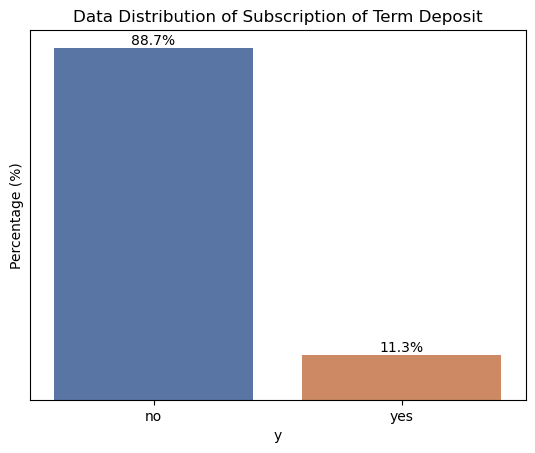

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(data=df, x='y', palette='deep')
total = len(df)

for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Add x-axis and y-axis titles
ax.set(xlabel='y', ylabel="Percentage (%)", title='Data Distribution of Subscription of Term Deposit')
ax.set_yticks([])
plt.show()

# Output
The subscription to term deposits displays an imbalance, with the majority of customers (88.7%) choosing not to opt for term deposits. A smaller proportion (11.3%) of clients have chosen to subscribe to term deposits. The data demonstrates a clear preference for non-subscription, but it's important to highlight that achieving an 11.3% success rate is a relatively favorable outcome.

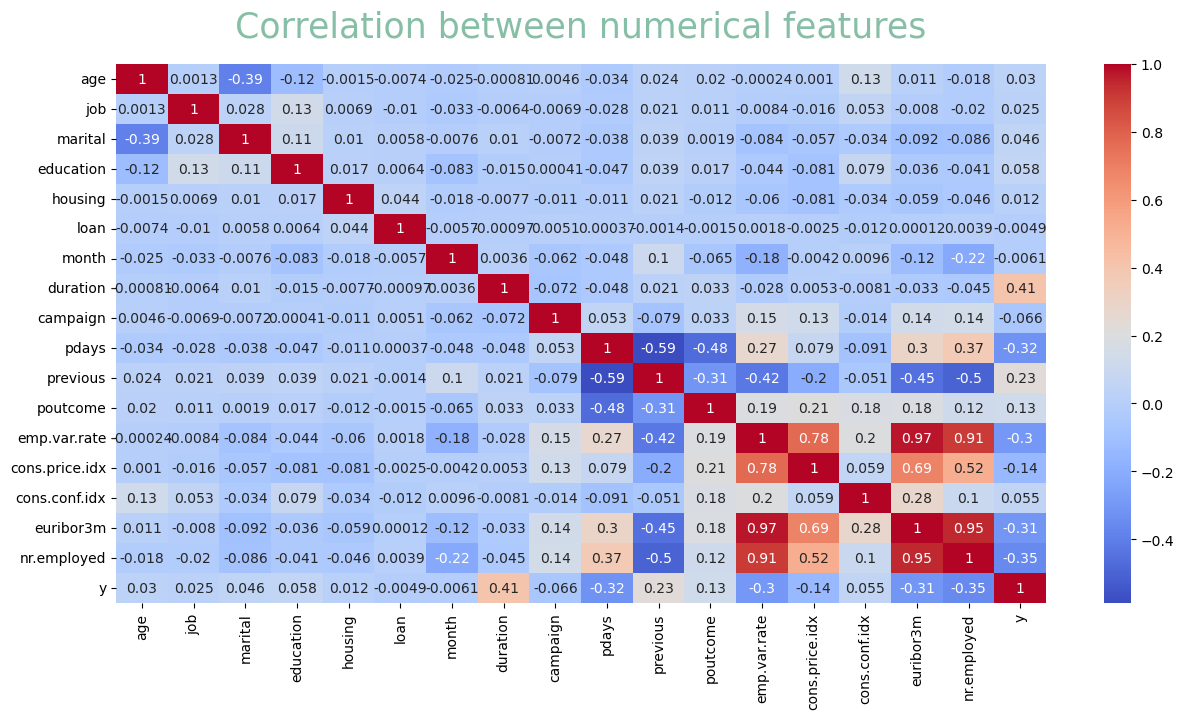

In [14]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() 
df['poutcome']= label_encoder.fit_transform(df['poutcome']) 
df['month']= label_encoder.fit_transform(df['month'])
df['loan']= label_encoder.fit_transform(df['loan'])
df['housing']= label_encoder.fit_transform(df['housing'])
df['education']= label_encoder.fit_transform(df['education'])
df['marital']= label_encoder.fit_transform(df['marital'])
df['job']= label_encoder.fit_transform(df['job'])
df['y']= label_encoder.fit_transform(df['y'])
df
heat_map = df.corr()
plt.figure(figsize=[15, 7])
plt.title("Correlation between numerical features", size=25, pad=20, color='#86bfa6')
sns.heatmap(heat_map, cmap='coolwarm', annot=True)
plt.show()

In [13]:
X_train = pickle.load(open('X_train', 'rb'))

X_test= pickle.load(open('X_test', 'rb'))

y_test= pickle.load(open('y_test', 'rb'))

y_train= pickle.load(open('y_train', 'rb'))




### Logistic Regression

In [14]:
# Use LogisticRegression from sklearn.linear_model to create a predictive model. 
model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1)

In [15]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = model.predict(X_test)
results



,actual,predicted
32884,0,0
3169,0,0
32206,0,0
9403,0,0
14020,0,0
...,...,...
15908,0,0
28222,0,1
14194,0,0
19764,0,0


### Model Performance

In [16]:
#logistic
# Record the models performance using the following metrics:
# - Accuracy
print(accuracy_score(y_train, model.predict(X_train)))
# - Recall
print(recall_score(y_train, model.predict(X_train)))
# - Precision
print(precision_score(y_train, model.predict(X_train)))
# - F1 Score
f1_score(y_train, model.predict(X_train))

0.8778837280836665
0.8981851737926791
0.863139225539462


0.8803135363280072

In [27]:
# Create a parameter grid for grid search
param_grid = {
    'C': [ 0.1, 1],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
}



### Grid Search

In [30]:

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3)  
grid_search.fit(X_train, y_train)

print("Grid Search - Best Parameters:")
print(grid_search.best_params_)

# Evaluate the model with the best parameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy_score_lr = accuracy_score(y_test, y_pred)
recall_score_lr = recall_score(y_test, y_pred)
precision_score_lr = precision_score(y_test, y_pred)
f1_score_lr = f1_score(y_test, y_pred)

print("Grid Search - Test Accuracy:", accuracy_score_lr)
print("Grid Search - Test Recall:", recall_score_lr)
print("Grid Search - Test Precision:", precision_score_lr)
print("Grid Search - Test F1 Score:", f1_score_lr)


Grid Search - Best Parameters:
{'C': 1, 'penalty': 'l2'}
Grid Search - Test Accuracy: 0.855466537185401
Grid Search - Test Recall: 0.8941684665226782
Grid Search - Test Precision: 0.43110031239153074
Grid Search - Test F1 Score: 0.5817330210772833


/Users/himakaranpusarla/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
6 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/himakaranpusarla/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/himakaranpusarla/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/himakaranpusarla/anaconda3/lib/python3.11/site

### Decision Tree Model

In [17]:
# Create a Decision Tree model
model = DecisionTreeClassifier()

In [18]:
# Fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
# Make predictions on the test data
y_pred = model.predict(X_test)


## Analyze the Decision Tree Model

In [20]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree model: {accuracy}")

# Calculate precision, recall, and F1 score 

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Recall : {recall}")
print(f"Precision : {precision}")
print(f"F1 Score : {f1}")

Accuracy of Decision Tree model: 0.8396860079307276
Recall : 0.8452123830093593
Precision : 0.39931972789115644
F1 Score : 0.5423885423885423


### Grid and Random Search Parameters

In [31]:
# Create a parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
}



In [32]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Grid Search - Best Parameters:")
print(grid_search.best_params_)

# Train a model with the best hyperparameters on the training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print("Grid Search - Test Accuracy:", accuracy_score(y_test, y_pred))
print("Grid Search - Test Recall:", recall_score(y_test, y_pred))
print("Grid Search - Test Precision:", precision_score(y_test, y_pred))
print("Grid Search - Test F1 Score:", f1_score(y_test, y_pred))

Grid Search - Best Parameters:
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Grid Search - Test Accuracy: 0.812575867929109
Grid Search - Test Recall: 0.7804175665946724
Grid Search - Test Precision: 0.35024232633279484
Grid Search - Test F1 Score: 0.48349687778768957


/Users/himakaranpusarla/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/himakaranpusarla/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/himakaranpusarla/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/himakaranpusarla/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    

### SVM Model

In [21]:
# Create an SVM classifier
model = SVC()

# Fit the model to the training data
model.fit(X_train, y_train)

SVC()

In [22]:
y_pred = model.predict(X_test)

### Analyze the Model Performance

In [23]:
# Calculating and printing accuracy for the linear svm model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8370154568260905


In [24]:
# Calculate precision, recall, and F1 score 
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Recall : {recall}")
print(f"Precision : {precision}")
print(f"F1 Score : {f1}")

Recall : 0.9251259899208063
Precision : 0.40219092331768386
F1 Score : 0.5606457242582897


### Non-Linear SVM

In [25]:
# Initialize the model with an RBF kernel
clf_rbf = SVC(kernel='rbf')
# Train the model
clf_rbf.fit(X_train, y_train)
# Make predictions
y_pred_rbf = clf_rbf.predict(X_test)

In [26]:
# Accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'RBF Kernel Accuracy: {accuracy_rbf}')

# Calculate precision, recall, and F1 score 
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f" RBF kernal Recall  : {recall}")
print(f" RBF Kernel Precision : {precision}")
print(f" RBF Kernel F1 Score : {f1}")

RBF Kernel Accuracy: 0.8370154568260905
 RBF kernal Recall  : 0.9251259899208063
 RBF Kernel Precision : 0.40219092331768386
 RBF Kernel F1 Score : 0.5606457242582897


##conclusion :
Based on the context of a bank's marketing campaign related to direct marketing of term deposits, here is a revised conclusion for the performance metrics of the different models:

**Logistic Regression:**
- Test Accuracy: 0.8555
- Test Recall: 0.8942
- Test Precision: 0.4311
- Test F1 Score: 0.5817

In the context of a bank's marketing campaign, the accuracy of the Logistic Regression model is quite good. Accuracy measures how many clients the model correctly classifies, which is important for cost-effective marketing. However, the relatively low precision indicates that there might be a significant number of false positive calls. Maximizing precision could help in minimizing the number of unnecessary calls to clients who are unlikely to subscribe to the term deposit.

**Decision Tree:**
- Test Accuracy: 0.8397
- Test Recall: 0.8452
- Test Precision: 0.3993
- Test F1 Score: 0.5424

The Decision Tree model also shows reasonable accuracy and recall. Recall is important in the context of the bank's campaign because it measures how well the model identifies potential subscribers. However, the relatively low precision suggests that there might be a higher number of false positive calls. Maximizing precision could help in improving the efficiency of marketing efforts by reducing unnecessary calls.

**Support Vector Machine (SVM):**
- Test Accuracy: 0.8370
- Test Recall: 0.9251
- Test Precision: 0.4022
- Test F1 Score: 0.5606

The SVM model achieves high recall, indicating that it excels in identifying clients who are likely to subscribe to the term deposit. High recall can be crucial in the banking campaign context because it minimizes the chances of missing potential subscribers. However, the relatively low precision suggests a trade-off, where there might be more false positives. Maximizing precision while maintaining a high level of recall could enhance the bank's marketing efficiency and reduce costs.

**Non-Linear SVM (RBF Kernel):**
- Test Accuracy: 0.8370
- Test Recall: 0.9251
- Test Precision: 0.4022
- Test F1 Score: 0.5606

The RBF Kernel SVM shows similar performance to the linear SVM, with high recall, which is vital in a banking campaign to avoid missing out on potential subscribers. However, the trade-off is lower precision. Maximizing precision, while keeping recall high, is essential to optimize the marketing campaign's efficiency and cost-effectiveness.

In summary, in the context of a bank's marketing campaign for term deposits, the choice of performance metric to maximize depends on the campaign's specific objectives. Maximizing recall is essential for identifying potential subscribers, while maximizing precision is crucial for minimizing unnecessary calls and improving the campaign's cost-effectiveness. The right balance between these metrics is essential for a successful marketing strategy.